In [2]:
# csv load
import pandas as pd

headers = ['center','left','right','steering','throttle','brake','speed']
csv = pd.read_csv('data/driving_log.csv', names=headers, skiprows=1)
csv.head()

,center,left,right,steering,throttle,brake,speed
0,IMG/center_2016_12_01_13_30_48_287.jpg,IMG/left_2016_12_01_13_30_48_287.jpg,IMG/right_2016_12_01_13_30_48_287.jpg,0.0,0.0,0.0,22.148290
1,IMG/center_2016_12_01_13_30_48_404.jpg,IMG/left_2016_12_01_13_30_48_404.jpg,IMG/right_2016_12_01_13_30_48_404.jpg,0.0,0.0,0.0,21.879630
2,IMG/center_2016_12_01_13_31_12_937.jpg,IMG/left_2016_12_01_13_31_12_937.jpg,IMG/right_2016_12_01_13_31_12_937.jpg,0.0,0.0,0.0,1.453011
3,IMG/center_2016_12_01_13_31_13_037.jpg,IMG/left_2016_12_01_13_31_13_037.jpg,IMG/right_2016_12_01_13_31_13_037.jpg,0.0,0.0,0.0,1.438419
4,IMG/center_2016_12_01_13_31_13_177.jpg,IMG/left_2016_12_01_13_31_13_177.jpg,IMG/right_2016_12_01_13_31_13_177.jpg,0.0,0.0,0.0,1.418236


8036
124


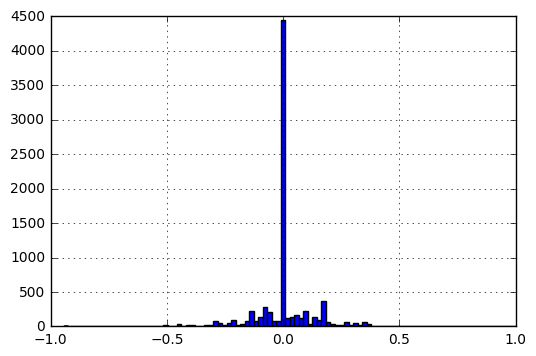

In [3]:
# data visualization
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

print(len(csv))
print(len(np.unique(csv.steering)))

csv.steering.hist(bins=100)

3288
823


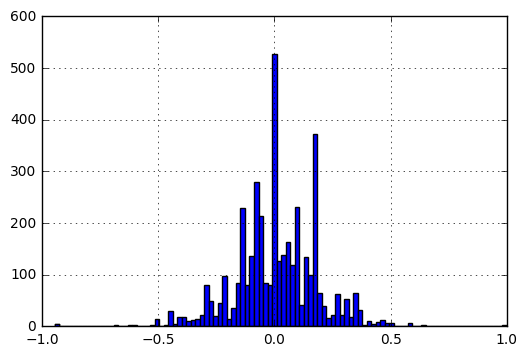

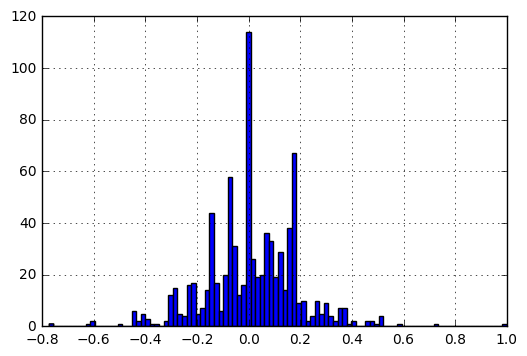

In [4]:
# split data
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

# 멈춰있을때 무시?
train_nonzero = csv[csv.steering != 0]
train_zero = (csv[csv.steering == 0]).sample(frac=.1)

train = pd.concat([train_nonzero, train_zero], ignore_index=True)
train.steering.hist(bins=100)

train_data, valid_data = train_test_split(shuffle(train), test_size=0.2, random_state=1234)

print(len(train_data))
print(len(valid_data))

plt.figure()
valid_data.steering.hist(bins=100)

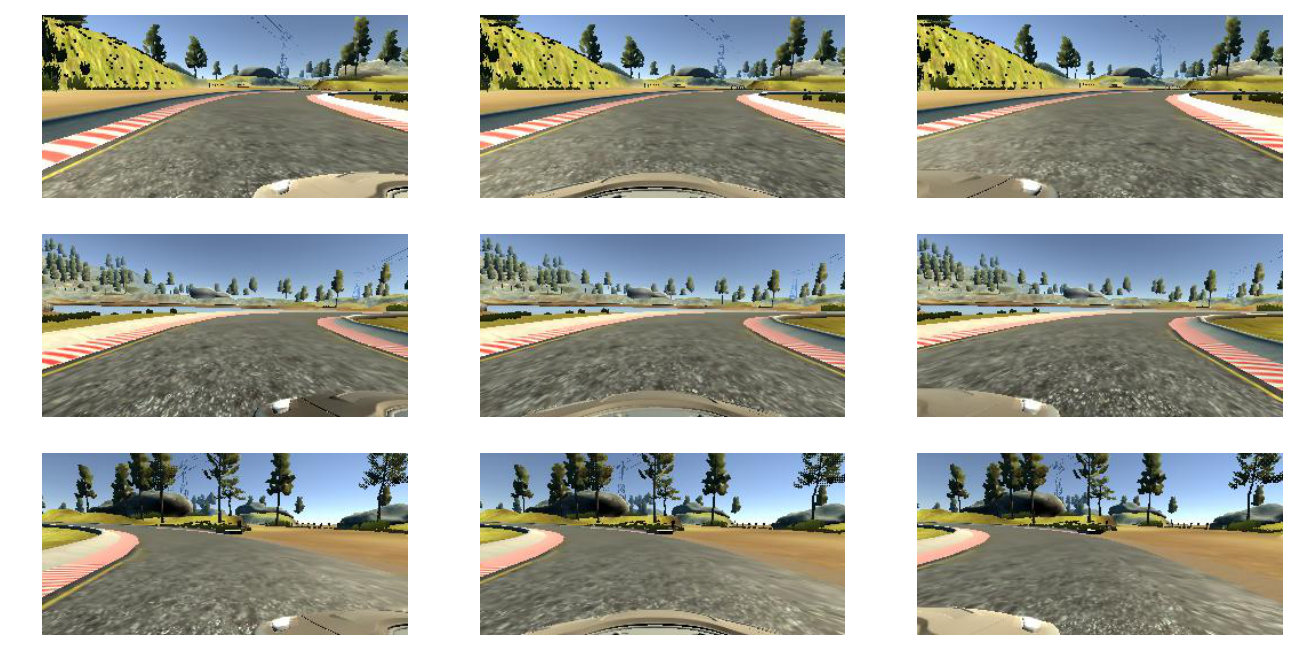

In [24]:
# image plotting
plt.figure(figsize=(16,8))
for i in range(3):
    row = train_data.iloc[i]
    left = plt.imread('data/'+row.left.strip())
    plt.subplot(3,3,i*3+1)
    plt.axis('off')
    plt.imshow(left)
    center = plt.imread('data/'+row.center.strip())
    plt.subplot(3,3,i*3+2)
    plt.axis('off')
    plt.imshow(center)
    right = plt.imread('data/'+row.right.strip())
    plt.subplot(3,3,i*3+3)
    plt.axis('off')
    plt.imshow(right)

In [ ]:
# preprocess
import cv2
    
def rgb_clahe(bgr_img,limit=20,grid=4):
    b,g,r = cv2.split(bgr_img)
    clahe = cv2.createCLAHE(clipLimit=limit, tileGridSize=(grid,grid))
    b = clahe.apply(b)
    g = clahe.apply(g)
    r = clahe.apply(r)
    return cv2.merge([b,g,r])

## Split Data
train_features = np.empty(shape=(0, 32, 32, 3), dtype=np.uint8)
valid_features = np.empty(shape=(0, 32, 32, 3), dtype=np.uint8)
train_labels = np.array([], dtype=np.uint8)
valid_labels = np.array([], dtype=np.uint8)
test_features, test_labels = X_test.copy(), y_test.copy()

for c in range(n_classes):
    indices = np.where(y_train == c)[0]
    np.random.shuffle(indices)
    valid_indices = indices[:30]
    train_indices = indices[30:]
    train_features = np.concatenate((train_features, X_train[train_indices]))
    train_labels = np.concatenate((train_labels, y_train[train_indices]))
    valid_features = np.concatenate((valid_features, X_train[valid_indices]))
    valid_labels = np.concatenate((valid_labels, y_train[valid_indices]))

## Apply CLAHE
train_features = np.array([rgb_clahe(img) for img in train_features])
valid_features = np.array([rgb_clahe(img) for img in valid_features])
test_features = np.array([rgb_clahe(img) for img in test_features])

# Generate Additional Data
new_images = []
new_labels = []
inputs_per_class = np.bincount(train_labels)
for c in range(n_classes):
    origins = np.where(train_labels == c)[0]
    for i in range(5000 - inputs_per_class[c]):
        idx = origins[i % inputs_per_class[c]]        
        new_images.append(generate_image(train_features[idx]))
        new_labels.append(c)
train_features = np.append(train_features, new_images, axis=0)
train_labels = np.append(train_labels, new_labels)

# Shuffle Train Data
train_features, train_labels = shuffle(train_features, train_labels)

# plotting the count of each sign
fig, ax = plt.subplots()
ax.bar(range(n_classes), np.bincount(train_labels), 0.5, color='r')
ax.set_xlabel('signs')
ax.set_ylabel('count of each sign')
ax.set_title('plotting the count of each sign')
plt.show()

# plotting images
plt.figure(figsize=(16, 16))
for c in range(n_classes):
    i = random.choice(np.where(train_labels == c)[0])
    plt.subplot(8, 8, c+1)
    plt.axis('off')
    plt.title('class: {}'.format(c))
    plt.imshow(train_features[i])

In [ ]:
def generate_image(img,ang_range=5,shear_range=5,trans_range=5):
    # Rotation
    ang_rot = np.random.uniform(ang_range)-ang_range/2
    rows,cols,ch = img.shape    
    Rot_M = cv2.getRotationMatrix2D((cols/2,rows/2),ang_rot,1)

    # Translation
    tr_x = trans_range*np.random.uniform()-trans_range/2
    tr_y = trans_range*np.random.uniform()-trans_range/2
    Trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])

    # Shear
    pts1 = np.float32([[5,5],[20,5],[5,20]])

    pt1 = 5+shear_range*np.random.uniform()-shear_range/2
    pt2 = 20+shear_range*np.random.uniform()-shear_range/2

    pts2 = np.float32([[pt1,5],[pt2,pt1],[5,pt2]])

    shear_M = cv2.getAffineTransform(pts1,pts2)
        
    img = cv2.warpAffine(img,Rot_M,(cols,rows))
    img = cv2.warpAffine(img,Trans_M,(cols,rows))
    img = cv2.warpAffine(img,shear_M,(cols,rows))
    
    return img